<a href="https://colab.research.google.com/github/malakelbasha78/AI-Skills-Projects/blob/main/new_dataset_ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
!pip install kagglehub


In [67]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("divyasharma20/plantv")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'plantv' dataset.
Path to dataset files: /kaggle/input/plantv


In [68]:
import os

print("Dataset path:", path)
for root, dirs, files in os.walk(path):
    print("Root:", root)
    print("Folders:", dirs)
    print("Files sample:", files[:5])
    break



Dataset path: /kaggle/input/plantv
Root: /kaggle/input/plantv
Folders: ['PlantVillage']
Files sample: []


In [69]:
plantv_path = os.path.join(path, "PlantVillage")
print("Folders/files inside PlantVillage:")
print(os.listdir(plantv_path)[:20])


Folders/files inside PlantVillage:
['val', 'train']


In [70]:
import os
dataset_path = "/kaggle/input/plantv/PlantVillage"
train_path = os.path.join(dataset_path, "train")
val_path   = os.path.join(dataset_path, "val")

classes = os.listdir(train_path)
print(f"Number of classes: {len(classes)}")
print("Sample classes:", classes[:10], "...")  # أول 10 classes

# photosTrain
print("\nNumber of images per class in TRAIN:")
total_train = 0
for cls in classes:
    cls_path = os.path.join(train_path, cls)
    num_images = len(os.listdir(cls_path))
    total_train += num_images
    print(f"{cls}: {num_images} images")

#   photosValidation
print("\nNumber of images per class in VALIDATION:")
total_val = 0
for cls in classes:
    cls_path = os.path.join(val_path, cls)
    num_images = len(os.listdir(cls_path))
    total_val += num_images
    print(f"{cls}: {num_images} images")

# all photos
print("\nTotal images:")
print(f"Train: {total_train}")
print(f"Validation: {total_val}")
print(f"Overall: {total_train + total_val}")


Number of classes: 39
Sample classes: ['Tomato___Late_blight', 'Tomato___healthy', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Potato___healthy', 'Corn_(maize)___Northern_Leaf_Blight', 'Tomato___Early_blight', 'Tomato___Septoria_leaf_spot'] ...

Number of images per class in TRAIN:
Tomato___Late_blight: 1527 images
Tomato___healthy: 1273 images
Grape___healthy: 339 images
Orange___Haunglongbing_(Citrus_greening): 4405 images
Soybean___healthy: 4072 images
Squash___Powdery_mildew: 1468 images
Potato___healthy: 121 images
Corn_(maize)___Northern_Leaf_Blight: 788 images
Tomato___Early_blight: 800 images
Tomato___Septoria_leaf_spot: 1417 images
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot: 410 images
Strawberry___Leaf_scorch: 887 images
Peach___healthy: 288 images
Apple___Apple_scab: 504 images
Tomato___Tomato_Yellow_Leaf_Curl_Virus: 4286 images
Tomato___Bacterial_spot: 1702 images
Apple___Black_rot: 496 images
Blueb

In [71]:
import os
import shutil
dataset_path = "/kaggle/input/plantv/PlantVillage"
train_path = os.path.join(dataset_path, "train")
val_path   = os.path.join(dataset_path, "val")

# فولدر جديد يحتوي كل الصور على بعضها
merged_path = "/content/PlantVillage_all"
os.makedirs(merged_path, exist_ok=True)

# أسماء الكلاسات
classes = os.listdir(train_path)

for cls in classes:
    cls_merged_path = os.path.join(merged_path, cls)
    os.makedirs(cls_merged_path, exist_ok=True)

    # نسخ صور من train
    for img in os.listdir(os.path.join(train_path, cls)):
        shutil.copy(os.path.join(train_path, cls, img), os.path.join(cls_merged_path, img))

    # نسخ صور من val
    for img in os.listdir(os.path.join(val_path, cls)):
        shutil.copy(os.path.join(val_path, cls, img), os.path.join(cls_merged_path, img))

print("All images are now in one folder per class without any train/validation split!")


All images are now in one folder per class without any train/validation split!


In [72]:
print("Classes in merged dataset:", os.listdir(merged_path)[:10])
for cls in os.listdir(merged_path):
    cls_path = os.path.join(merged_path, cls)
    print(f"{cls}: {len(os.listdir(cls_path))} images")


Classes in merged dataset: ['Apple___Black_rot', 'Pepper,_bell___healthy', 'Grape___Black_rot', 'Grape___healthy', 'Soybean___healthy', 'Corn_(maize)___Northern_Leaf_Blight', 'Tomato___Late_blight', 'Apple___Apple_scab', 'Peach___healthy', 'Peach___Bacterial_spot']
Apple___Black_rot: 621 images
Pepper,_bell___healthy: 1478 images
Grape___Black_rot: 1180 images
Grape___healthy: 423 images
Soybean___healthy: 5090 images
Corn_(maize)___Northern_Leaf_Blight: 985 images
Tomato___Late_blight: 1909 images
Apple___Apple_scab: 630 images
Peach___healthy: 360 images
Peach___Bacterial_spot: 2297 images
Tomato___Tomato_mosaic_virus: 373 images
Tomato___Target_Spot: 1404 images
background: 715 images
Grape___Esca_(Black_Measles): 1383 images
Apple___healthy: 1645 images
Orange___Haunglongbing_(Citrus_greening): 5507 images
Tomato___Bacterial_spot: 2127 images
Strawberry___healthy: 456 images
Raspberry___healthy: 371 images
Strawberry___Leaf_scorch: 1109 images
Tomato___Septoria_leaf_spot: 1771 imag

In [73]:
import os

# المسار بعد الدمج
merged_path = "/content/PlantVillage_all"

# أسماء الكلاسات
classes = os.listdir(merged_path)

# عدد الكلاسات الفعلي
num_classes = len(classes)

# إجمالي عدد الصور بعد الدمج
total_images = sum(len(os.listdir(os.path.join(merged_path, cls))) for cls in classes)

print(f"Number of classes: {num_classes}")
print(f"Total number of images after merging: {total_images}")


Number of classes: 39
Total number of images after merging: 55020


In [74]:
# باخد نسخه بعد ما جمعت الداتا على بعض
import os
import shutil

# مسار الداتا الأصلية
dataset_path = "/content/PlantVillage_all"

# فولدر لحفظ النسخ الأصلية
backup_path = "/content/PlantVillage_backup"
os.makedirs(backup_path, exist_ok=True)

# نسخ كل الصور لكل class
for cls in os.listdir(dataset_path):
    cls_path = os.path.join(dataset_path, cls)
    cls_backup_path = os.path.join(backup_path, cls)
    os.makedirs(cls_backup_path, exist_ok=True)

    for img_name in os.listdir(cls_path):
        src_path = os.path.join(cls_path, img_name)
        dst_path = os.path.join(cls_backup_path, img_name)
        shutil.copy(src_path, dst_path)

print(f"Backup completed! All original images are saved in {backup_path}")


Backup completed! All original images are saved in /content/PlantVillage_backup


In [75]:
from PIL import Image
import hashlib
import os

def remove_duplicates(dataset_path):
    hashes = {}
    removed_count = 0
    total_images_before = sum(len(os.listdir(os.path.join(dataset_path, cls))) for cls in os.listdir(dataset_path))
    print(f"Total images before removing duplicates: {total_images_before}")

    for cls in os.listdir(dataset_path):
        cls_path = os.path.join(dataset_path, cls)
        for img_name in os.listdir(cls_path):
            img_path = os.path.join(cls_path, img_name)
            with Image.open(img_path) as img:
                img_hash = hashlib.md5(img.tobytes()).hexdigest()
            if img_hash in hashes:
                os.remove(img_path)
                removed_count += 1
            else:
                hashes[img_hash] = img_path

    total_images_after = sum(len(os.listdir(os.path.join(dataset_path, cls))) for cls in os.listdir(dataset_path))
    print(f"Removed {removed_count} duplicate images.")
    print(f"Total images after removing duplicates: {total_images_after}")

remove_duplicates("/content/PlantVillage_all")


Total images before removing duplicates: 55020
Removed 24 duplicate images.
Total images after removing duplicates: 54996


In [76]:
import cv2
import numpy as np

def enhance_blurry_images(dataset_path, threshold=100):
    total_images = 0
    blurry_images = 0

    for cls in os.listdir(dataset_path):
        cls_path = os.path.join(dataset_path, cls)
        for img_name in os.listdir(cls_path):
            img_path = os.path.join(cls_path, img_name)
            img = cv2.imread(img_path)
            if img is None:
                continue
            total_images += 1
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            fm = cv2.Laplacian(gray, cv2.CV_64F).var()

            if fm < threshold:
                blurry_images += 1
                # معالجة البلور باستخدام Sharpening kernel
                kernel = np.array([[0,-1,0], [-1,5,-1], [0,-1,0]])
                sharp = cv2.filter2D(img, -1, kernel)
                cv2.imwrite(img_path, sharp)

    print(f"Total images processed: {total_images}")
    print(f"Number of blurry images enhanced: {blurry_images}")

enhance_blurry_images("/content/PlantVillage_all", threshold=100)


Total images processed: 54996
Number of blurry images enhanced: 3485


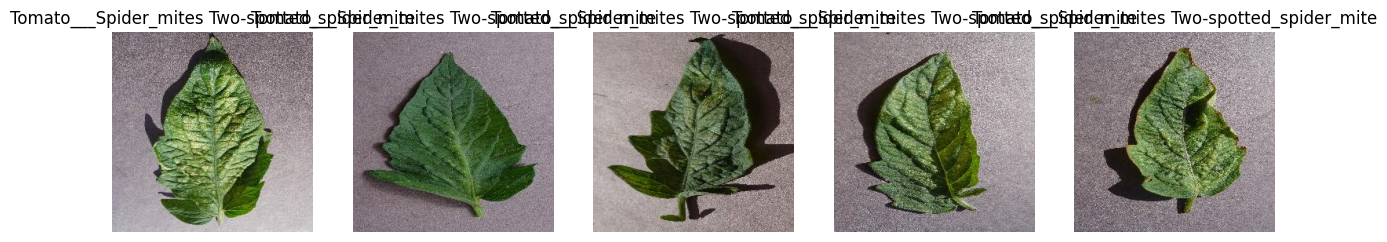

In [89]:
import os
import random
import cv2
import matplotlib.pyplot as plt
# بشوف الداتا بعد ما عملت شاربينج للداتا
enhanced_path = "/content/PlantVillage_all"

cls = random.choice(os.listdir(enhanced_path))
cls_path = os.path.join(enhanced_path, cls)

# اختيار 5 صور عشوائية من الكلاس
sample_images = random.sample(os.listdir(cls_path), 5)

plt.figure(figsize=(15,5))

for i, img_name in enumerate(sample_images):
    img_path = os.path.join(cls_path, img_name)
    img = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.subplot(1, 5, i+1)
    plt.imshow(img_rgb)
    plt.title(f"{cls}")
    plt.axis('off')

plt.show()


In [78]:
# before any transform
from torchvision import datasets

full_dataset = datasets.ImageFolder(dataset_path)  # بدون أي transform دلوقتي



In [79]:
#data splitting
from torch.utils.data import random_split

total_len = len(full_dataset)
train_size = int(0.7 * total_len)
val_size   = int(0.15 * total_len)
test_size  = total_len - train_size - val_size  # يبقى تقريباً 15%

train_dataset, val_dataset, test_dataset = random_split(full_dataset, [train_size, val_size, test_size])

print(f"Train size: {len(train_dataset)}")
print(f"Validation size: {len(val_dataset)}")
print(f"Test size: {len(test_dataset)}")


Train size: 38497
Validation size: 8249
Test size: 8250


In [80]:
from torchvision import transforms

# fully augmented
train_transforms = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.RandomRotation(30),
    transforms.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.3, hue=0.1),
    transforms.RandomResizedCrop(224, scale=(0.8,1.0)),
    transforms.ToTensor(),
    transforms.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])
])
    #scaling and normalize test &val
val_test_transforms = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])
])


In [81]:
# original dataset
full_dataset = datasets.ImageFolder(dataset_path)

# transforms data after split  اتعملت علشان احفظ الداتا في نفس المكان القديم بعد ال  transform
train_dataset.dataset.transform     = train_transforms
val_dataset.dataset.transform       = val_test_transforms
test_dataset.dataset.transform      = val_test_transforms


In [82]:
# بحل مشكله ال  imbalance in classes  on train_dataset only
from torch.utils.data import WeightedRandomSampler

# حساب عدد العينات لكل class
class_counts = [0] * len(full_dataset.classes)
for _, label in full_dataset.samples:
    class_counts[label] += 1

# حساب الوزن لكل class
class_weights = [0.] * len(class_counts)
total_count = sum(class_counts)
for i, count in enumerate(class_counts):
    class_weights[i] = total_count / (len(class_counts) * count)

# وزن كل صورة في train
sample_weights = [class_weights[label] for _, label in train_dataset]
sampler = WeightedRandomSampler(weights=sample_weights, num_samples=len(sample_weights), replacement=True)


In [83]:
# هنا بقسم الداتا لباتشز علشان تخلي الموديل يدخله داتا اكتر وةيبقى اسرع في كل ايبوك
from torch.utils.data import DataLoader

train_loader = DataLoader(train_dataset, batch_size=32, sampler=sampler)
val_loader   = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader  = DataLoader(test_dataset, batch_size=32, shuffle=False)


# ** testing after data processing



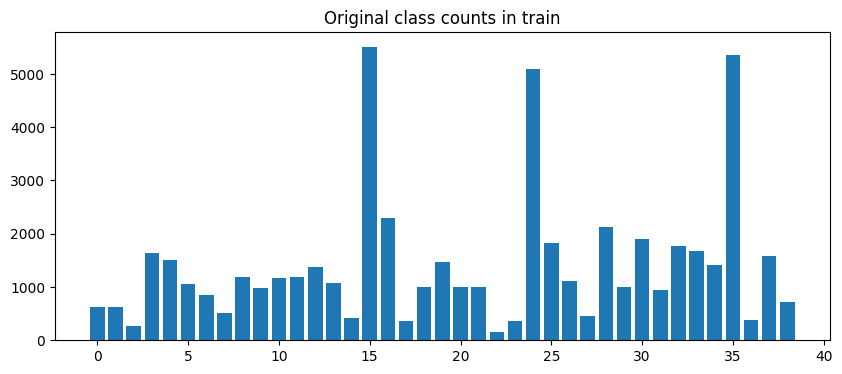

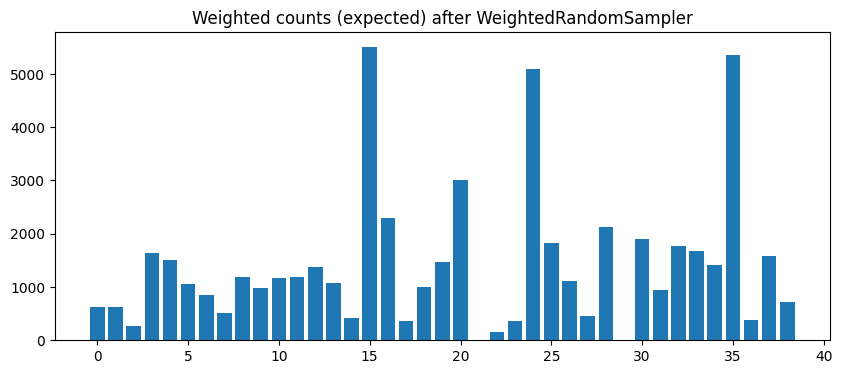

In [84]:
# بعمل تشيك على ال  imbalance classes  يعد ما اسخدمت weightsampler
import torch
import matplotlib.pyplot as plt
from torch.utils.data import WeightedRandomSampler
import numpy as np

# حساب عدد العينات لكل class
class_counts = [0] * len(full_dataset.classes)
for _, label in train_dataset.dataset.samples:
    class_counts[label] += 1

# حساب الوزن لكل class
total_count = sum(class_counts)
class_weights = np.array([total_count / (len(class_counts) * c) for c in class_counts])

# وزن كل صورة في train
sample_weights = [class_weights[label] for _, label in train_dataset.dataset.samples]
sampler = WeightedRandomSampler(weights=sample_weights, num_samples=len(sample_weights), replacement=True)

# عرض histogram قبل الوزن
plt.figure(figsize=(10,4))
plt.bar(range(len(class_counts)), class_counts)
plt.title("Original class counts in train")
plt.show()

# توزيع متوقع بعد sampler
weighted_counts = [0]*len(class_counts)
for w in sample_weights:
    weighted_counts[int(np.argmin(np.abs(class_weights - w)))] += 1

plt.figure(figsize=(10,4))
plt.bar(range(len(class_counts)), weighted_counts)
plt.title("Weighted counts (expected) after WeightedRandomSampler")
plt.show()



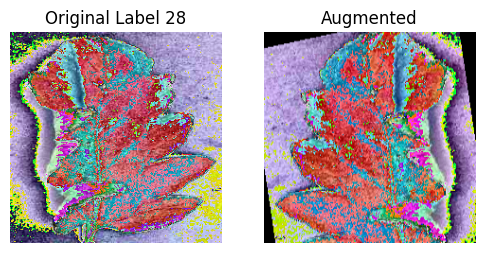

In [90]:
from PIL import Image
from torchvision import transforms
import random
import matplotlib.pyplot as plt

idx = random.randint(0, len(train_dataset)-1)
img_tensor, label = train_dataset[idx]

# تحويل Tensor → PIL Image
# إذا Tensor قيمه 0-1
img_pil = transforms.ToPILImage()(img_tensor)

# عرض الصورة الأصلية
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plt.imshow(img_pil)
plt.title(f"Original Label {label}")
plt.axis('off')

# تعريف Augmentation
aug_transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.RandomRotation(30),
    transforms.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.3, hue=0.1),
    transforms.RandomResizedCrop(224, scale=(0.8,1.0)),
    transforms.ToTensor()
])

# تطبيق Augmentation على PIL Image
img_aug = aug_transform(img_pil)

# تحويل لعرض
img_aug_np = img_aug.permute(1,2,0).numpy()
plt.subplot(1,2,2)
plt.imshow((img_aug_np - img_aug_np.min())/(img_aug_np.max()-img_aug_np.min()))
plt.title("Augmented")
plt.axis('off')
plt.show()


In [86]:
from torchvision import transforms

# التحويل اللي عايزين نطبقه للفحص
transform_check = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])
])

# اختيار أي index للفحص
idx = 0

# شيل transform مؤقتًا عشان ناخد PIL Image أصلية
original_transform = train_dataset.dataset.transform
train_dataset.dataset.transform = None

# اخد الصورة والlabel بدون أي transform
raw_img, label = train_dataset[idx]

# طبق  transform للفحص
img_trans = transform_check(raw_img)

train_dataset.dataset.transform = original_transform
class_name = train_dataset.dataset.classes[label]

print(f"Class label index: {label}")
print(f"Class name: {class_name}")
print(f"Tensor shape: {img_trans.shape}")
print(f"Pixel value range: min={img_trans.min():.3f}, max={img_trans.max():.3f}")


Class label index: 8
Class name: Corn_(maize)___Common_rust_
Tensor shape: torch.Size([3, 224, 224])
Pixel value range: min=-2.118, max=2.306
